# Exercise 1: Linear Fit

Generate a linear dataset and fit it using both NumPy's `polyfit` and `scipy.optimize.curve_fit` to compare the results. This will illustrate the consistency between different methods for a straightforward linear fit.


Comparison of fitting results:
NumPy coefficients: [ 1.59770643 -4.24806034]
SciPy coefficients: m=1.597706426912917, b=-4.248060334961122


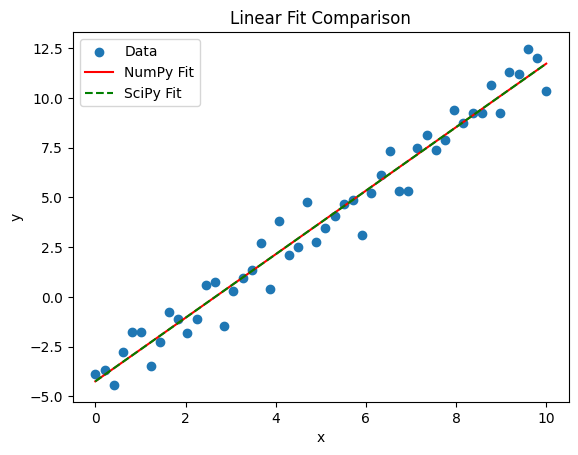

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate linear data
m, b = 1.5, -4  # True slope and intercept
x_linear = np.linspace(0, 10, 50)
y_linear = m * x_linear + b + np.random.normal(0, 1, x_linear.shape)

# Fitting using numpy.polyfit
coefficients_linear_np = np.polyfit(x_linear, y_linear, 1)

# Define a linear model for curve_fit
def linear_model(x, m, b):
    return m * x + b

# Fitting using scipy.optimize.curve_fit
coefficients_linear_scipy, _ = curve_fit(linear_model, x_linear, y_linear)

# Output comparison
print("Comparison of fitting results:")
print(f"NumPy coefficients: {coefficients_linear_np}")
print(f"SciPy coefficients: m={coefficients_linear_scipy[0]}, b={coefficients_linear_scipy[1]}")

# Plotting both fits for visualization
plt.scatter(x_linear, y_linear, label='Data')
plt.plot(x_linear, np.poly1d(coefficients_linear_np)(x_linear), 'r-', label='NumPy Fit')
plt.plot(x_linear, linear_model(x_linear, *coefficients_linear_scipy), 'g--', label='SciPy Fit')
plt.title('Linear Fit Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Exercise 2: Polynomial Degree Exploration

Experiment with fitting polynomials of different degrees to the quadratic dataset generated earlier. Analyze how changing the degree affects the quality of the fit.


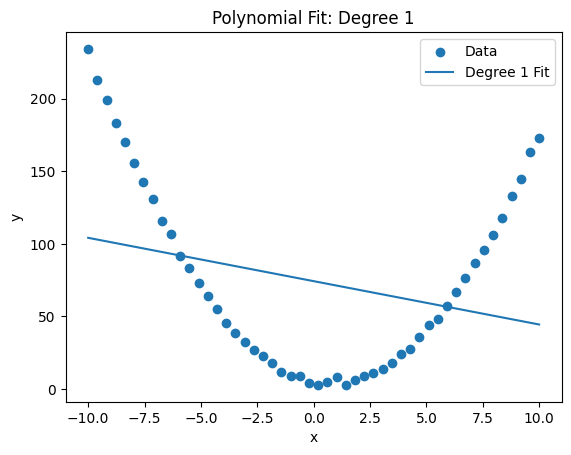

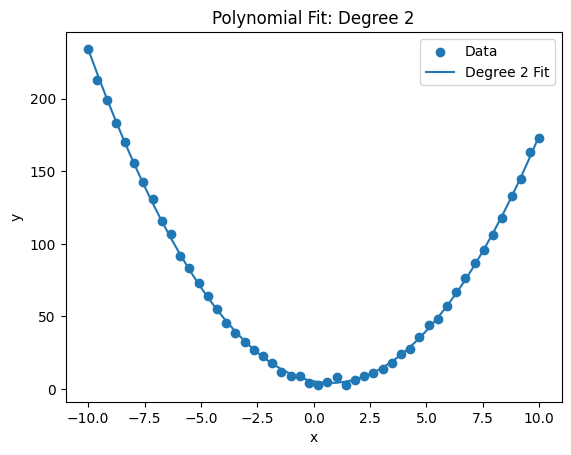

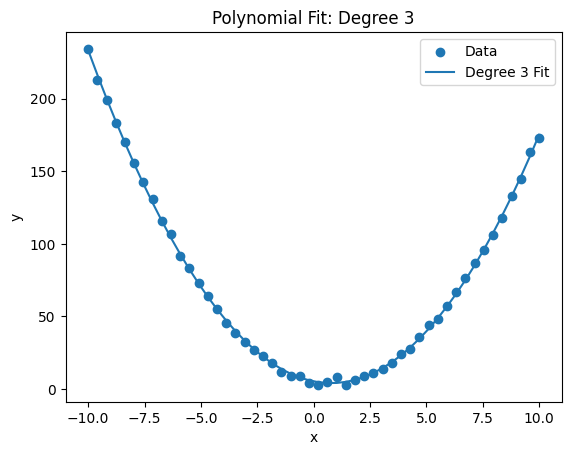

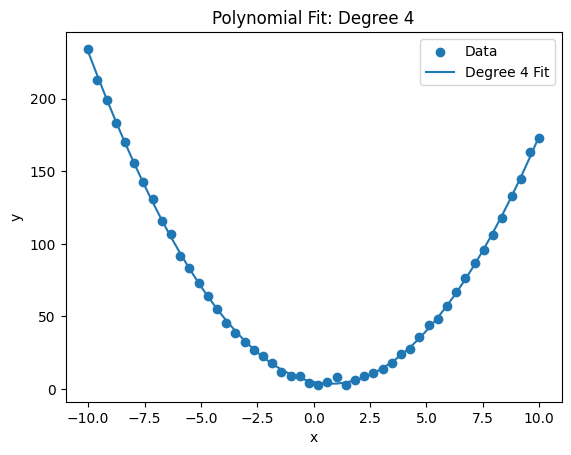

In [3]:
# Regenerate the quadratic dataset
a, b, c = 2, -3, 5  # Coefficients for the quadratic function
x_values = np.linspace(-10, 10, 50)  # X values
noise = np.random.normal(0, 2, x_values.shape)  # Noise
y_values = a * x_values**2 + b * x_values + c + noise  # Y values

# Fit and plot for different polynomial degrees
for degree in [1, 2, 3, 4]:
    coefficients = np.polyfit(x_values, y_values, degree)
    p = np.poly1d(coefficients)
    y_fit = p(x_values)

    # Plotting the data and the polynomial fits
    plt.figure()
    plt.scatter(x_values, y_values, label='Data')
    plt.plot(x_values, y_fit, label=f'Degree {degree} Fit')
    plt.title(f'Polynomial Fit: Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


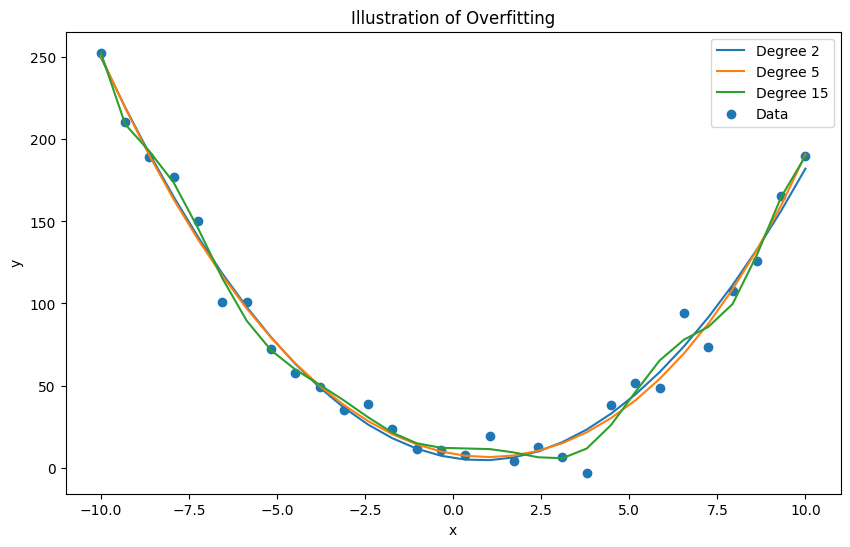

In [11]:
# Regenerate the quadratic dataset
np.random.seed(0)  # Seed for reproducibility
x_overfit = np.linspace(-10, 10, 30)  # Fewer points to accentuate the effect of noise
y_overfit = 2 * x_overfit**2 - 3 * x_overfit + 5 + np.random.normal(0, 10, x_overfit.shape)

# Fit polynomials of degree
degrees = [2, 5, 15]
plt.figure(figsize=(10, 6))

for degree in degrees:
    coefficients = np.polyfit(x_overfit, y_overfit, degree)
    p = np.poly1d(coefficients)
    y_fit_overfit = p(x_overfit)

    plt.plot(x_overfit, y_fit_overfit, label=f'Degree {degree}')

# Plot the original data
plt.scatter(x_overfit, y_overfit, label='Data')
plt.title('Illustration of Overfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
